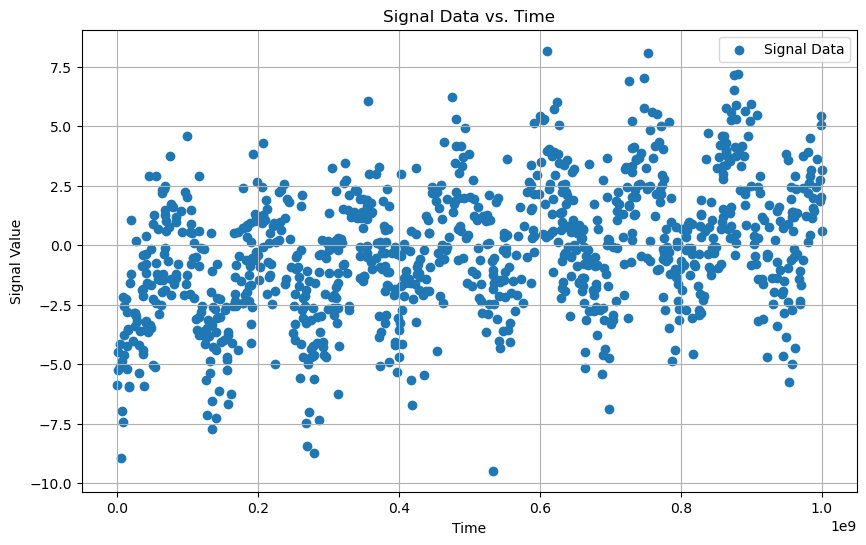

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create empty lists to store the time and signal values
time_values = []
signal_values = []

# Open the data file and read line by line
with open("signal.dat", "r") as file:
    next(file)  # Skip the header line
    for line in file:
        # Split each line into time and signal
        parts = line.split("|")
        time = float(parts[1].strip())
        signal = float(parts[2].strip())
        
        # Append the values to the respective lists
        time_values.append(time)
        signal_values.append(signal)

# Convert lists to NumPy arrays for easier manipulation
time = np.array(time_values)
signal = np.array(signal_values)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(time, signal, label="Signal Data")
plt.xlabel("Time")
plt.ylabel("Signal Value")
plt.title("Signal Data vs. Time")
plt.legend()
plt.grid(True)
plt.show()

In [2]:
# Sort the data by time
sorted_indices = np.argsort(time)
time = time[sorted_indices]
signal = signal[sorted_indices]

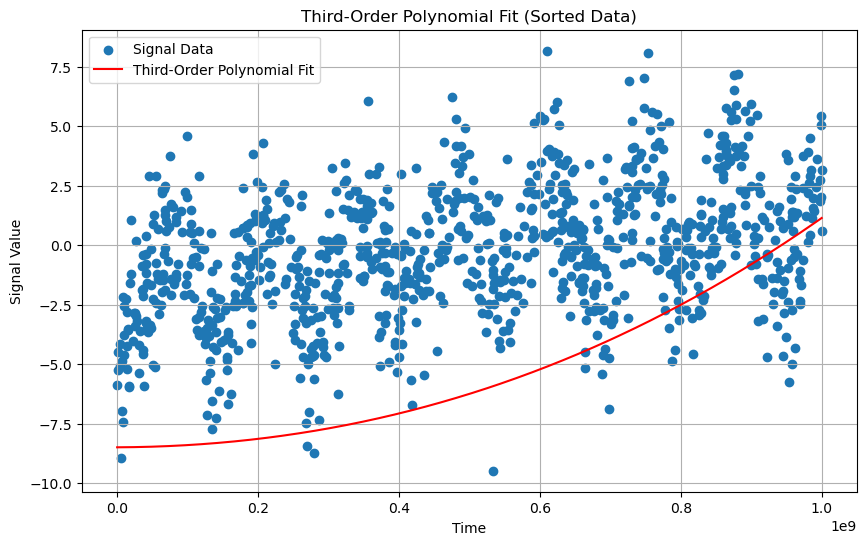

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sort the data by time
sorted_indices = np.argsort(time)
time = time[sorted_indices]
signal = signal[sorted_indices]

# Create the design matrix for the third-order polynomial
A = np.column_stack([time**0, time**1, time**2, time**3])

# Perform Singular Value Decomposition (SVD)
U, S, VT = np.linalg.svd(A, full_matrices=False)

# Calculate the coefficients of the third-order polynomial fit
coefficients = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ signal

# Generate the polynomial fit
poly_fit = A @ coefficients

# Plot the data and the polynomial fit
plt.figure(figsize=(10, 6))
plt.scatter(time, signal, label="Signal Data")
plt.plot(time, poly_fit, label="Third-Order Polynomial Fit", color='red')
plt.xlabel("Time")
plt.ylabel("Signal Value")
plt.title("Third-Order Polynomial Fit (Sorted Data)")
plt.legend()
plt.grid(True)
plt.show()

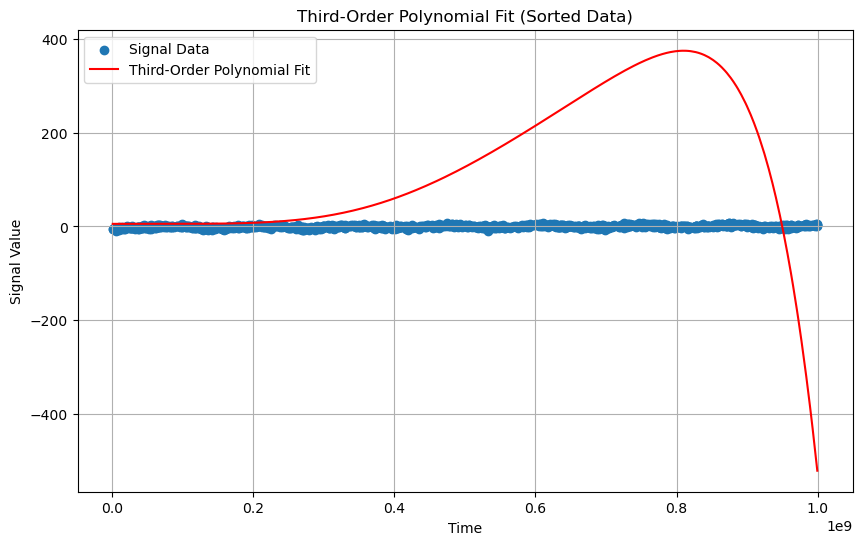

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sort the data by time
sorted_indices = np.argsort(time)
time = time[sorted_indices]
signal = signal[sorted_indices]

# Create the design matrix for the third-order polynomial
A = np.column_stack([time**0, time**1, time**2, time**3,time**4,time**5,time**6,time**7,time**8,time**9,time**10])

# Perform Singular Value Decomposition (SVD)
U, S, VT = np.linalg.svd(A, full_matrices=False)

# Calculate the coefficients of the third-order polynomial fit
coefficients = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ signal

# Generate the polynomial fit
poly_fit = A @ coefficients

# Plot the data and the polynomial fit
plt.figure(figsize=(10, 6))
plt.scatter(time, signal, label="Signal Data")
plt.plot(time, poly_fit, label="Third-Order Polynomial Fit", color='red')
plt.xlabel("Time")
plt.ylabel("Signal Value")
plt.title("Third-Order Polynomial Fit (Sorted Data)")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
import numpy as np

# Calculate the residuals
residuals = signal - poly_fit

# Calculate the reduced chi-squared value
uncertainty = 2.0  # Standard deviation of measurement uncertainties
chi_squared = np.sum((residuals / uncertainty)**2)
degrees_of_freedom = len(signal) - len(coefficients)
reduced_chi_squared = chi_squared / degrees_of_freedom

print(f"Reduced Chi-squared value: {reduced_chi_squared}")

Reduced Chi-squared value: 10403.22797223389


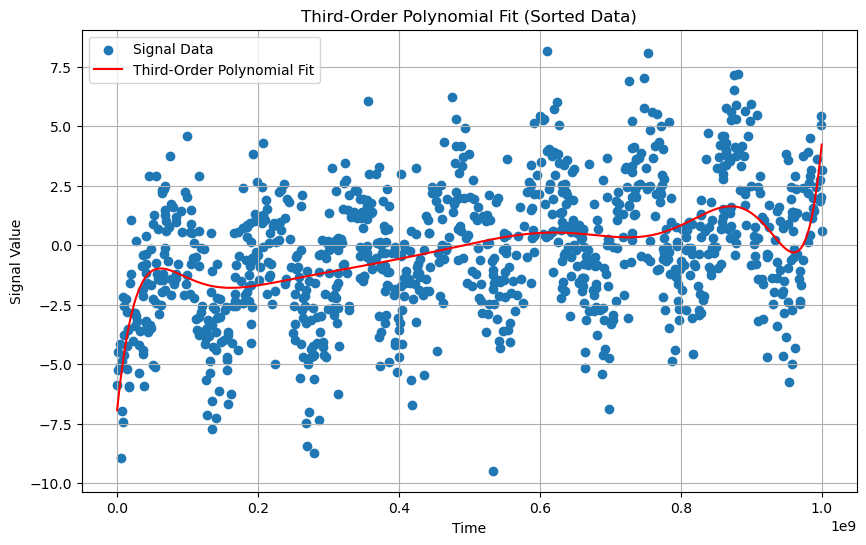

In [12]:
timep = (time - time.mean()) / time.std()

A = np.zeros((len(timep), 12))
A[:, 0] = 1.
A[:, 1] = timep 
A[:, 2] = timep**2
A[:, 3] = timep**3
A[:, 4] = timep**4
A[:, 5] = timep**5

A[:, 6] = timep**6
A[:, 7] = timep**7

A[:, 8] = timep**8
A[:, 9] = timep**9

A[:, 10] = timep**10
A[:, 11] = timep**11


# Perform Singular Value Decomposition (SVD)
U, S, VT = np.linalg.svd(A, full_matrices=False)

# Calculate the coefficients of the third-order polynomial fit
coefficients = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ signal

# Generate the polynomial fit
poly_fit = A @ coefficients

# Plot the data and the polynomial fit
plt.figure(figsize=(10, 6))
plt.scatter(time, signal, label="Signal Data")
plt.plot(time, poly_fit, label="Third-Order Polynomial Fit", color='red')
plt.xlabel("Time")
plt.ylabel("Signal Value")
plt.title("Third-Order Polynomial Fit (Sorted Data)")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
import numpy as np

# Calculate the residuals
residuals = signal - poly_fit

# Calculate the reduced chi-squared value
uncertainty = 2.0  # Standard deviation of measurement uncertainties
chi_squared = np.sum((residuals / uncertainty)**2)
degrees_of_freedom = len(signal) - len(coefficients)
reduced_chi_squared = chi_squared / degrees_of_freedom

print(f"Reduced Chi-squared value: {reduced_chi_squared}")

Reduced Chi-squared value: 1.5120464010892114


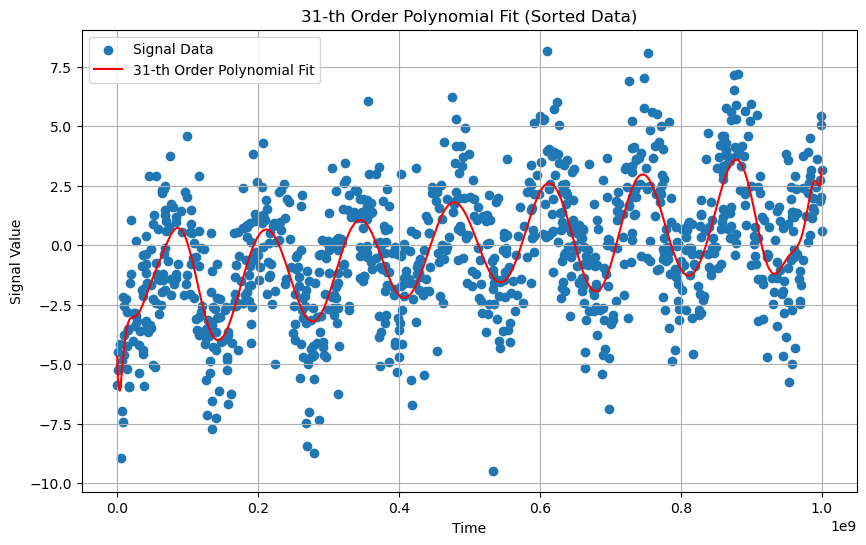

In [14]:

# Sort the data by time
sorted_indices = np.argsort(time)
time = time[sorted_indices]
signal = signal[sorted_indices]

# Define the order of the higher-order polynomial (e.g., 10th order)
order = 31

# Create the design matrix for the higher-order polynomial
A = np.column_stack([timep**i for i in range(order + 1)])

# Perform Singular Value Decomposition (SVD)
U, S, VT = np.linalg.svd(A, full_matrices=False)

# Calculate the coefficients of the higher-order polynomial fit
coefficients = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ signal

# Generate the higher-order polynomial fit
poly_fit = A @ coefficients

# Plot the data and the higher-order polynomial fit
plt.figure(figsize=(10, 6))
plt.scatter(time, signal, label="Signal Data")
plt.plot(time, poly_fit, label=f"{order}-th Order Polynomial Fit", color='red')
plt.xlabel("Time")
plt.ylabel("Signal Value")
plt.title(f"{order}-th Order Polynomial Fit (Sorted Data)")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
import numpy as np

# Calculate the residuals
residuals = signal - poly_fit

# Calculate the reduced chi-squared value
uncertainty = 2.0  # Standard deviation of measurement uncertainties
chi_squared = np.sum((residuals / uncertainty)**2)
degrees_of_freedom = len(signal) - len(coefficients)
reduced_chi_squared = chi_squared / degrees_of_freedom

print(f"Reduced Chi-squared value: {reduced_chi_squared}")

Reduced Chi-squared value: 1.0374747590829816


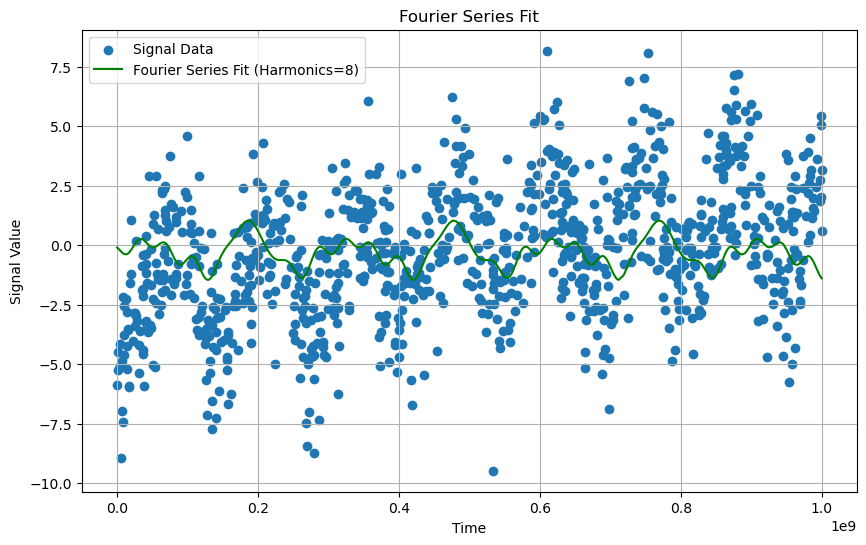

In [16]:

# Define the number of Fourier components (harmonics)
num_harmonics = 8  # You can adjust this as needed

# Create the design matrix for the Fourier series
design_matrix = np.column_stack([np.sin(2 * np.pi * i * timep) for i in range(1, num_harmonics + 1)] +
                                [np.cos(2 * np.pi * i * timep) for i in range(1, num_harmonics + 1)] + [np.ones_like(time)])

# Perform a linear regression to fit the Fourier series
coefficients = np.linalg.lstsq(design_matrix, signal, rcond=None)[0]

# Generate the Fourier series fit
fourier_fit = design_matrix @ coefficients

# Plot the data and the Fourier series fit
plt.figure(figsize=(10, 6))
plt.scatter(time, signal, label="Signal Data")
plt.plot(time, fourier_fit, label=f"Fourier Series Fit (Harmonics={num_harmonics})", color='green')
plt.xlabel("Time")
plt.ylabel("Signal Value")
plt.title(f"Fourier Series Fit")
plt.legend()
plt.grid(True)
plt.show()

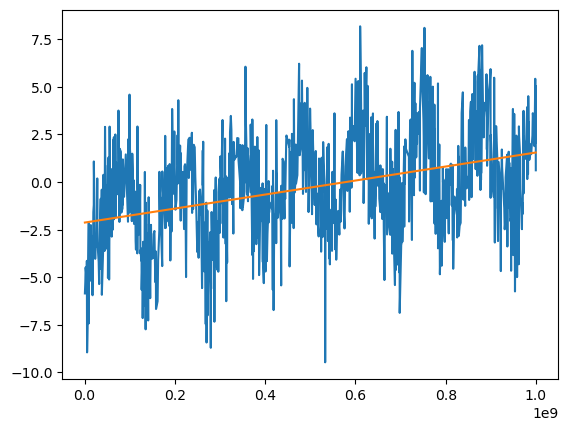

In [17]:
#estimate linear trend
N = len(time)
A = np.zeros((len(time), 2))
A[:, 0] = 1.
A[:, 1] = time
(u, w, vt) = np.linalg.svd(A, full_matrices=False)
ainv = vt.transpose().dot(np.diag(1. / w)).dot(u.transpose())
c = ainv.dot(signal)
ym = A.dot(c) 
plt.plot(time, signal)
plt.plot(time, ym)

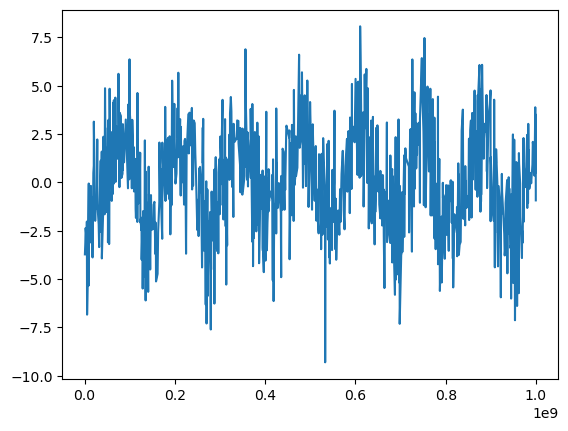

In [18]:
#subtract off linear trend
flat_signal = signal-ym
plt.plot(time, flat_signal)

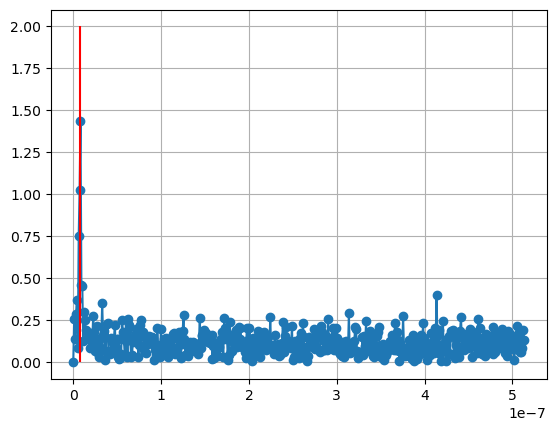

In [19]:
# calculate FFT of oscillations
from scipy.fft import fft, fftfreq
# sample spacing
T = time[1]-time[0]
yf = fft(flat_signal)
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), '-o')
plt.grid()
omega = 2*np.pi*xf[np.argsort(2.0/N * np.abs(yf[0:N//2]))[::-1]][0]
plt.vlines(omega/(2*np.pi), 0, 2, color = 'red')

0.0
0.06346651825433926
0.12693303650867852
0.1903995547630178
0.25386607301735703
0.3173325912716963
0.3807991095260356
0.4442656277803748
0.5077321460347141
0.5711986642890533
0.6346651825433925
0.6981317007977318
0.7615982190520711
0.8250647373064104
0.8885312555607496
0.9519977738150889
1.0154642920694281
1.0789308103237674
1.1423973285781066
1.2058638468324459
1.269330365086785
1.3327968833411243
1.3962634015954636
1.4597299198498028
1.5231964381041423
1.5866629563584815
1.6501294746128208
1.71359599286716
1.7770625111214993
1.8405290293758385
1.9039955476301778
1.967462065884517
2.0309285841388562
2.0943951023931957
2.1578616206475347
2.221328138901874
2.284794657156213
2.3482611754105527
2.4117276936648917
2.475194211919231
2.53866073017357
2.6021272484279097
2.6655937666822487
2.729060284936588
2.792526803190927
2.8559933214452666
2.9194598396996057
2.982926357953945
3.0463928762082846
3.1098593944626236
3.173325912716963
3.236792430971302
3.3002589492256416
3.3637254674799806


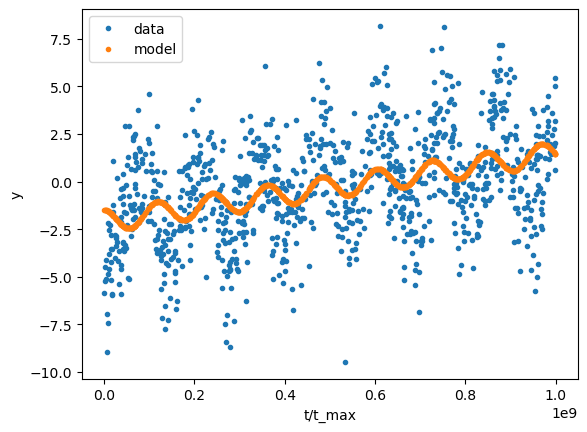

In [55]:


testN = 100
offset = np.linspace(0,2*np.pi,testN)
data = np.zeros(testN)


for index, value in enumerate(offset):
    amplitude = 0.1
    A = np.zeros((len(time), 4))
    print(value)
    A[:, 0] = 1.
    A[:, 1] = time
    A[:, 2] = amplitude*(np.cos(omega*time))
    A[:, 3] = amplitude*(np.sin(omega*time))

    (u, w, vt) = np.linalg.svd(A, full_matrices=False)
    ainv = vt.transpose().dot(np.diag(1. / w)).dot(u.transpose())
    c = ainv.dot(signal)
    ym = A.dot(c) 

    # print(w)
    # plt.plot(time, signal, '.', label='data')
    # plt.plot(time, ym, '.', label='model')
    # plt.xlabel('t/t_max')
    # plt.ylabel('y')
    # plt.legend()

    # Calculate the residuals
    residuals = signal - ym

    # Calculate the reduced chi-squared value
    uncertainty = 2.0  # Standard deviation of measurement uncertainties
    chi_squared = np.sum((residuals / uncertainty)**2)
    degrees_of_freedom = len(signal) - len(coefficients)
    reduced_chi_squared = chi_squared / degrees_of_freedom
    data[index] = reduced_chi_squared

plt.plot(time, signal, '.', label='data')
plt.plot(time, ym, '.', label='model')
plt.xlabel('t/t_max')
plt.ylabel('y')
plt.legend()

In [41]:
print(data)

[1.58776362 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362
 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362
 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362
 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362
 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362
 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362
 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362
 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362
 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362
 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362
 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362
 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362
 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362
 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362
 1.58776362 1.58776362 1.58776362 1.58776362 1.58776362 1.5877

In [112]:
(u, w, vt) = np.linalg.svd(A, full_matrices=False)
ainv = vt.transpose().dot(np.diag(1. / w)).dot(u.transpose())
c = ainv.dot(signal)
ym = A.dot(c) 

[31.87556653 31.68834847 22.75505761 21.49428255]


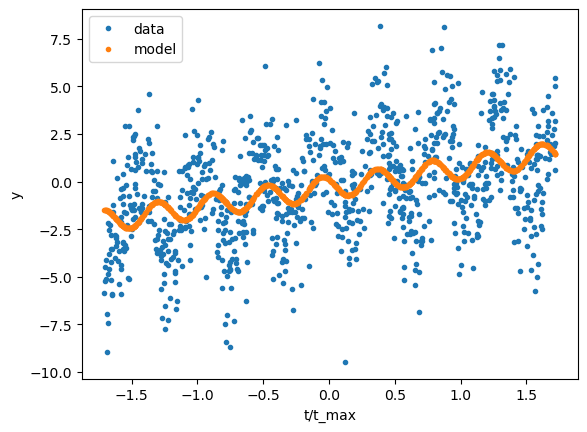

In [113]:
print(w)
plt.plot(time, signal, '.', label='data')
plt.plot(time, ym, '.', label='model')
plt.xlabel('t/t_max')
plt.ylabel('y')
plt.legend()

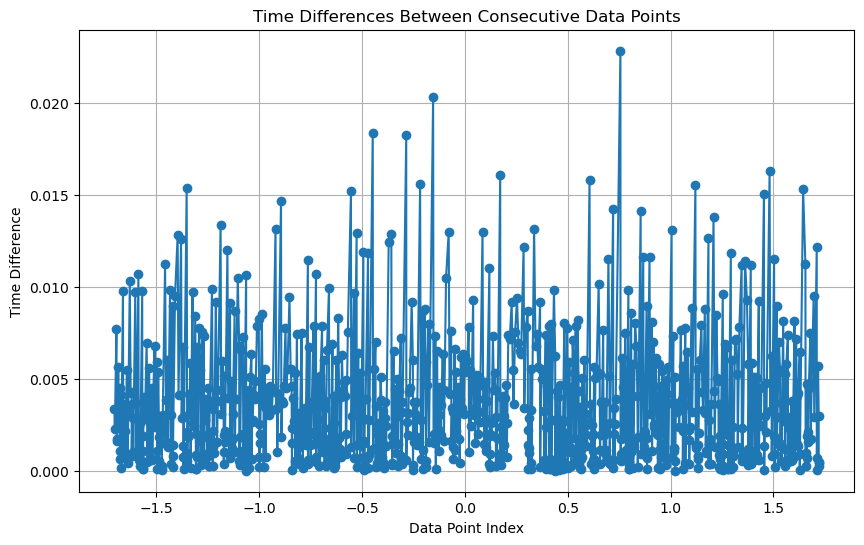

In [114]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the time differences between consecutive data points
time_diff = np.diff(time)

# Create a plot of time differences
plt.figure(figsize=(10, 6))
plt.plot(time[1:], time_diff, marker='o', linestyle='-')
plt.xlabel("Data Point Index")
plt.ylabel("Time Difference")
plt.title("Time Differences Between Consecutive Data Points")
plt.grid(True)
plt.show()

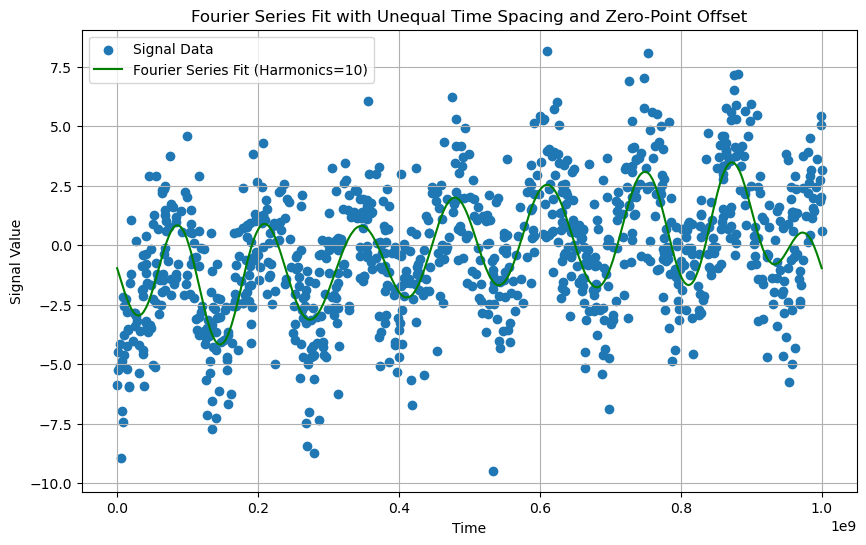

In [33]:

from sklearn.linear_model import LinearRegression
# Calculate the time intervals (assuming uneven spacing)
time_intervals = np.diff(time)
# Calculate the cumulative time intervals (for phase calculations)
cumulative_time_intervals = np.cumsum(np.insert(time_intervals, 0, 0))

# Define the number of Fourier components (harmonics)
num_harmonics = 10

# Create the design matrix for the Fourier series with zero-point offset
A_fourier = np.zeros((len(time), 2 * num_harmonics + 1))
A_fourier[:, 0] = 1  # Zero-point offset

# Calculate the phase for each harmonic component based on time intervals
period = cumulative_time_intervals[-1]  # Total time span
for i in range(1, num_harmonics + 1):
    A_fourier[:, 2 * i - 1] = np.sin(2 * np.pi * i * cumulative_time_intervals / period)
    A_fourier[:, 2 * i] = np.cos(2 * np.pi * i * cumulative_time_intervals / period)

# Perform Linear Regression to fit the Fourier series
regressor = LinearRegression(fit_intercept=False)  # Avoid fitting a separate intercept
regressor.fit(A_fourier, signal)

# Get the coefficients for the Fourier series
coefficients_fourier = regressor.coef_

# Generate the Fourier series fit
fourier_fit = A_fourier @ coefficients_fourier

# Plot the data and the Fourier series fit
plt.figure(figsize=(10, 6))
plt.scatter(time, signal, label="Signal Data")
plt.plot(time, fourier_fit, label=f"Fourier Series Fit (Harmonics={num_harmonics})", color='green')
plt.xlabel("Time")
plt.ylabel("Signal Value")
plt.title(f"Fourier Series Fit with Unequal Time Spacing and Zero-Point Offset")
plt.legend()
plt.grid(True)
plt.show()

1.5670397966599268
1.5670397966599265


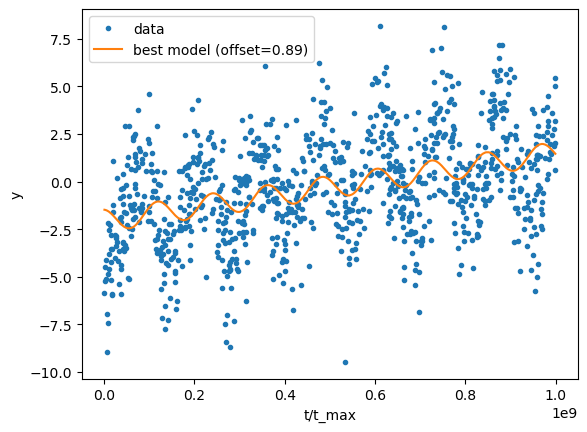

Best Offset: 0.8885312555607496


In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Number of test offsets
testN = 100
offsets = np.linspace(0, 2 * np.pi, testN)

# Initialize arrays to store results
best_offset = None
best_c = None
best_ym = None
best_reduced_chi_squared = float('inf')

for offset in offsets:
    A = np.zeros((len(time), 4))
    A[:, 0] = 1.
    A[:, 1] = time
    A[:, 2] = np.cos(omega * time) + offset
    A[:, 3] = np.sin(omega * time)

    # Perform SVD
    u, w, vt = np.linalg.svd(A, full_matrices=False)
    ainv = vt.transpose().dot(np.diag(1. / w)).dot(u.transpose())
    c = ainv.dot(signal)
    ym = A.dot(c)

    # Calculate the residuals
    residuals = signal - ym

    # Calculate the reduced chi-squared value
    uncertainty = 2.0  # Standard deviation of measurement uncertainties
    chi_squared = np.sum((residuals / uncertainty)**2)
    degrees_of_freedom = len(signal) - len(c)
    reduced_chi_squared = chi_squared / degrees_of_freedom

    # Store the best model based on the lowest reduced chi-squared
    if reduced_chi_squared < best_reduced_chi_squared:
        print(reduced_chi_squared)
        best_reduced_chi_squared = reduced_chi_squared
        best_offset = offset
        best_c = c
        best_ym = ym

# Plot the best model
plt.plot(time, signal, '.', label='data')
plt.plot(time, best_ym, label='best model (offset={:.2f})'.format(best_offset))
plt.xlabel('t/t_max')
plt.ylabel('y')
plt.legend()
plt.show()

print("Best Offset:", best_offset)

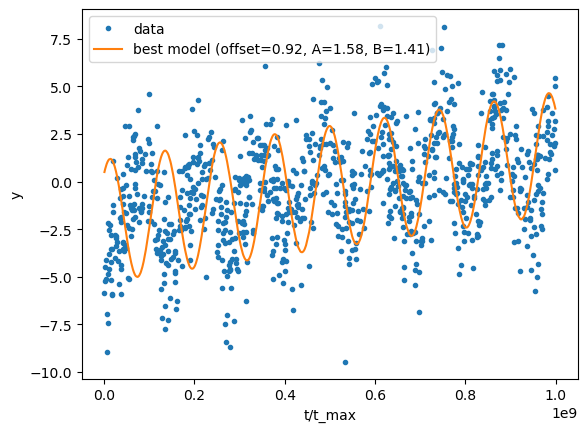

Best Reduced_Chi_Squared:  2.6184632729133033
Best Offset: 0.9202645146879193
Best A: 1.583910095964617
Best B: 1.4146437106890062


In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Number of test offsets
testN = 100
offsets = np.linspace(0, np.pi, testN)

# Initialize arrays to store results
best_offset = None
best_A = None
best_B = None
best_ym = None
best_reduced_chi_squared = float('inf')
amplitude = 0.28

for offset in offsets:
    A = np.zeros((len(time), 4))
    A[:, 0] = 1.
    A[:, 1] = time
    A[:, 2] = amplitude*(np.cos(omega * time + offset))
    A[:, 3] = amplitude*(np.sin(omega * time + offset))

    # Perform SVD
    u, w, vt = np.linalg.svd(A, full_matrices=False)
    ainv = vt.transpose().dot(np.diag(1. / w)).dot(u.transpose())
    c = ainv.dot(signal)
    
    # Extract coefficients for amplitudes
    A_fit = c[2]  # Amplitude for the cosine term
    B_fit = c[3]  # Amplitude for the sine term
    
    # Update the design matrix with the optimized amplitudes
    A[:, 2] = A_fit * np.cos(omega * time)
    A[:, 3] = B_fit * np.sin(omega * time)
    
    ym = A.dot(c)

    # Calculate the residuals
    residuals = signal - ym

    # Calculate the reduced chi-squared value
    uncertainty = 2.0  # Standard deviation of measurement uncertainties
    chi_squared = np.sum((residuals / uncertainty)**2)
    degrees_of_freedom = len(signal) - len(c)
    reduced_chi_squared = chi_squared / degrees_of_freedom

    # Store the best model based on the lowest reduced chi-squared
    if reduced_chi_squared < best_reduced_chi_squared:

        best_reduced_chi_squared = reduced_chi_squared
        best_offset = offset
        best_A = A_fit
        best_B = B_fit
        best_ym = ym
    
plt.plot(time, signal, '.', label='data')
plt.plot(time, best_ym, label='best model (offset={:.2f}, A={:.2f}, B={:.2f})'.format(best_offset, best_A, best_B))
plt.xlabel('t/t_max')
plt.ylabel('y')
plt.legend()
plt.show()



print("Best Reduced_Chi_Squared: ", best_reduced_chi_squared)
print("Best Offset:", best_offset)
print("Best A:", best_A)
print("Best B:", best_B)